<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/HasanTohidi/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Git

In [26]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

fatal: destination path 'Advance-Statistical-Learnin--Semester-3' already exists and is not an empty directory.


#Data Reading

In [27]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [28]:
display(df.columns)

Index(['Patient_ID', 'Visit_ID', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG', 'Therapy',
       'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb', 'MRC_Bulbar',
       'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

#PreProccessing

In [29]:
"""
Ordinal Data:
FVC


Nominal Data:
Tracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry




"""

'\nOrdinal Data:\nFVC\n\n\nNominal Data:\nTracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry\n\n\n\n\n'

##TreeBase

### Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

# Select the nominal columns for encoding
nominal_cols = ['Tracheostomy', 'Therapy', 'Ventilation', 'PEG', 'Clinical_onset_type','Spirometry','FVC']

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Apply Label Encoding to each nominal column
for col in nominal_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the new DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [31]:
# Drop Patient_ID and Visit_ID columns
df_encoded1 = df_encoded.drop(['Patient_ID', 'Visit_ID'], axis=1)

# Display the first few rows of the new DataFrame to verify
display(df_encoded1.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,3,1,3,0,0,0,1,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,3,1,0,0,0,0,3,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,0,1,3,0,0,0,3,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,3,1,3,0,0,0,1,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


###PreProccessing

In [32]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded1.drop('KINGS_Total', axis=1)
y = df_encoded1['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 21)
Testing set shape: (283, 21)


In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data shape after scaling:", X_train_scaled.shape)
print("Testing data shape after scaling:", X_test_scaled.shape)

Training data shape after scaling: (1129, 21)
Testing data shape after scaling: (283, 21)


###Modeling

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier model
# You can tune the hyperparameters like n_estimators, max_depth, etc.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7845

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        48
           2       0.55      0.62      0.58        53
           3       0.83      0.70      0.76        83
           4       0.90      0.96      0.93        99

    accuracy                           0.78       283
   macro avg       0.76      0.76      0.76       283
weighted avg       0.79      0.78      0.78       283



In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Adjust the target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_test_indexed = y_test - 1


# Train the model using the scaled data
model_xgb.fit(X_train_scaled, y_train_indexed)

# Make predictions on the scaled test set
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_indexed, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print classification report for more detailed evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test_indexed, y_pred_xgb))

XGBoost Accuracy: 0.7774

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.57      0.62      0.59        53
           2       0.76      0.73      0.75        83
           3       0.91      0.91      0.91        99

    accuracy                           0.78       283
   macro avg       0.76      0.75      0.75       283
weighted avg       0.78      0.78      0.78       283



In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Ensure necessary variables are defined by running preceding cells that define:
# y, X_train_scaled, y_train_indexed, X_test_scaled, y_test_indexed


# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# Initialize XGBoost Classifier
# Ensure num_class is set based on the unique values in your target variable
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=3,
                           verbose=2)

# Fit grid search to the training data (using scaled data from previous steps)
grid_search.fit(X_train_scaled, y_train_indexed)

# Get the best parameters and best model
print("Best hyperparameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set (using scaled data)
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test_indexed, y_pred_best)
print(f"Best Model Test Accuracy: {accuracy_best:.4f}")

NameError: name 'y' is not defined

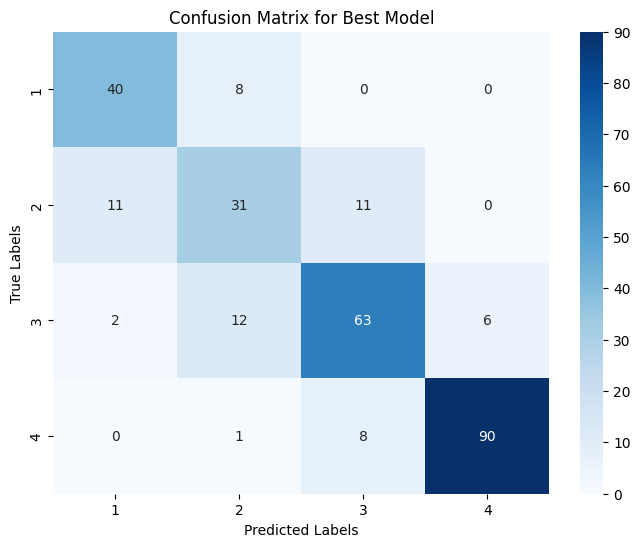

Confusion Matrix:
[[40  8  0  0]
 [11 31 11  0]
 [ 2 12 63  6]
 [ 0  1  8 90]]


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After grid search and best model evaluation
y_pred_best = best_model.predict(X_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test_indexed, y_pred_best)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Best Model")
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


##LinearModel

###Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [37]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,...,ALSFRS_R,ALSAQ_5,Therapy_0,Therapy_1,Therapy_2,Therapy_3,Clinical_onset_type_0,Clinical_onset_type_1,Clinical_onset_type_2,Clinical_onset_type_3
0,133,3,0,19.0,1,3,0,0,0,33.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,79,1,0,65.0,1,0,0,0,0,14.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,81,1,1,79.0,1,3,0,0,0,6.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,214,1,0,51.0,1,3,0,0,0,18.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,214,2,0,51.0,1,3,0,0,0,18.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###PreProcessing

In [38]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X_linear = df_encoded.drop('KINGS_Total', axis=1)
y_linear = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("Training set shape:", X_train_linear.shape)
print("Testing set shape:", X_test_linear.shape)

Training set shape: (1129, 29)
Testing set shape: (283, 29)


In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

print("Training data shape after scaling:", X_train_linear_scaled.shape)
print("Testing data shape after scaling:", X_test_linear_scaled.shape)

Training data shape after scaling: (1129, 29)
Testing data shape after scaling: (283, 29)


###Modeling

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM Classifier model
# You can tune hyperparameters like C, kernel, gamma, etc.
model_svm = SVC(random_state=42)

# Train the model using the scaled data
model_svm.fit(X_train_linear_scaled, y_train_linear)

# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_linear, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print classification report for more detailed evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test_linear, y_pred_svm))

SVM Accuracy: 0.7350

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.60      0.60        48
           2       0.51      0.60      0.55        53
           3       0.84      0.63      0.72        83
           4       0.87      0.96      0.91        99

    accuracy                           0.73       283
   macro avg       0.70      0.70      0.70       283
weighted avg       0.75      0.73      0.73       283



In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

# Adjust the target variable to be 0-indexed for ANN
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_ann.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

# Make predictions and print classification report
y_pred_ann = model_ann.predict(X_test_linear_scaled)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1)

print("\nANN Classification Report:")
# Use the original y_test_linear for the classification report labels for clarity
print(classification_report(y_test_linear_indexed, y_pred_ann_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.7420
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.60        48
           1       0.48      0.74      0.58        53
           2       0.80      0.69      0.74        83
           3       0.95      0.90      0.92        99

    accuracy                           0.74       283
   macro avg       0.73      0.71      0.71       283
weighted avg       0.77      0.74      0.75       283



In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                 metrics=['accuracy'])

# Display the model summary
model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556 (6.08 KB)

 Trainable params: 1,556 (6.08 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
X_train.columns.size

21

In [44]:
# Adjust the target variable to be 0-indexed for training
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_nn.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy_nn = model_nn.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"\nNeural Network Accuracy: {accuracy_nn:.4f}")

# Make predictions and print classification report
y_pred_nn = model_nn.predict(X_test_linear_scaled)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test_linear_indexed, y_pred_nn_classes))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1999 - loss: 1.7269 - val_accuracy: 0.3540 - val_loss: 1.3148
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3693 - loss: 1.2749 - val_accuracy: 0.5177 - val_loss: 1.1264
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5313 - loss: 1.0868 - val_accuracy: 0.5752 - val_loss: 1.0236
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5671 - loss: 0.9787 - val_accuracy: 0.6150 - val_loss: 0.9489
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 0.9292 - val_accuracy: 0.6327 - val_loss: 0.8948
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6369 - loss: 0.8734 - val_accuracy: 0.6637 - val_loss: 0.8488
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6514 - loss: 0.8292 - val_accuracy: 0.6549 - val_loss: 0.8106
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6549 - loss: 0.7954 - val_accuracy: 0.6637 - val_loss

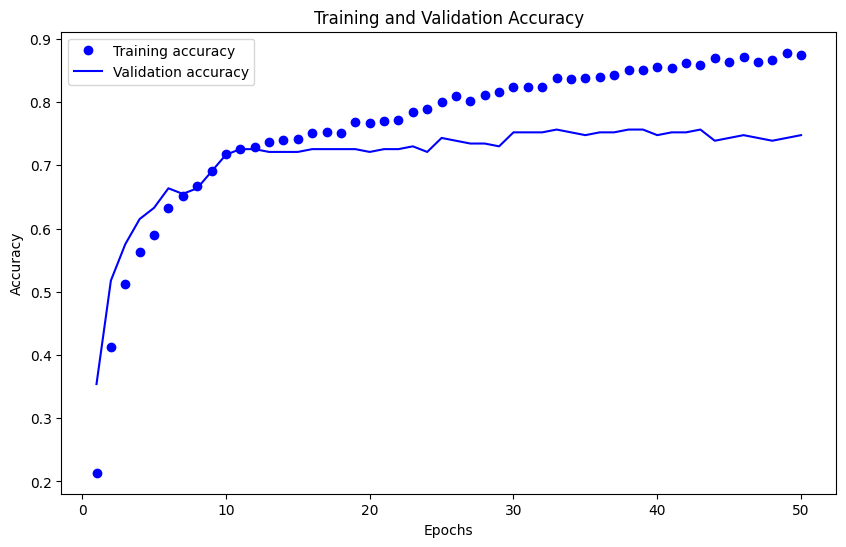

In [45]:
import matplotlib.pyplot as plt

# Get the accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

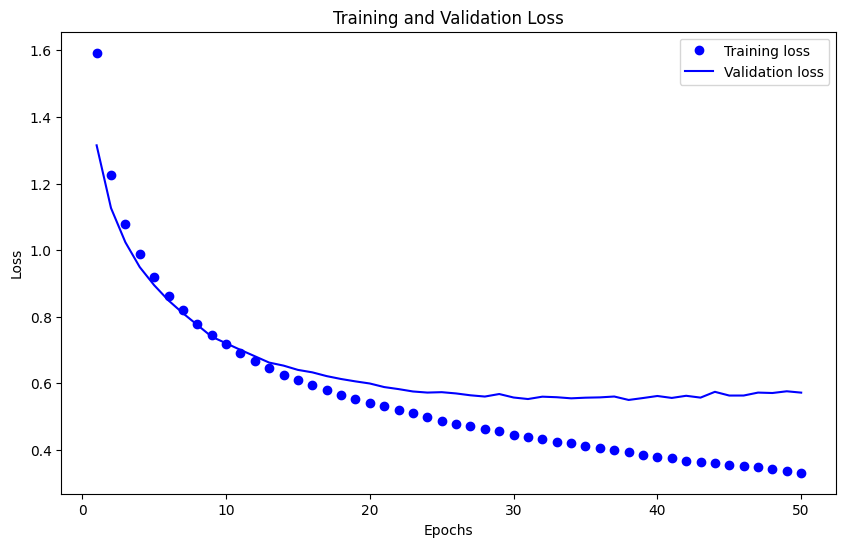

In [46]:
import matplotlib.pyplot as plt

# Get the loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
import numpy as np

# Find the index of the best test accuracy from the grid search results
best_test_accuracy_index = np.argmax(grid_search.cv_results_['mean_test_score'])

# Get the corresponding model number (add 1 because index is 0-based)
best_model_number = best_test_accuracy_index + 1

print(f"The model with the highest test accuracy is Model {best_model_number}.")

The model with the highest test accuracy is Model 25.
